In [59]:
import pandas as pd
from collections import defaultdict

In [60]:
adult_clean = pd.read_csv('testdata/Adult500.csv')

In [61]:
adult_clean['Maritalstatus'].unique()

array(['Married-civ-spouse', 'Never-married', 'Divorced', 'Widowed',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [62]:
adult_clean['Relationship'].unique()

array(['Husband', 'Own-child', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [63]:
adult_clean.sample(n=5)

Age     Workclass     Education       Maritalstatus       Occupation  \
298    >50  Self-emp-inc   Prof-school  Married-civ-spouse  Exec-managerial   
408  31-50       Private     Bachelors             Widowed  Exec-managerial   
0    31-50       Private  Some-college  Married-civ-spouse     Craft-repair   
21   22-30       Private       HS-grad  Married-civ-spouse     Craft-repair   
296    <18       Private          11th       Never-married            Sales   

    Relationship   Race     Sex HoursPerWeek        Country       Income  
298      Husband  White    Male           40  United-States  LessThan50K  
408    Unmarried  White    Male        18-21  United-States  LessThan50K  
0        Husband  White    Male           40  United-States  LessThan50K  
21          Wife  White  Female           36  United-States  LessThan50K  
296    Own-child  White  Female           15  United-States  LessThan50K

In [64]:
adult_clean[['Relationship','Maritalstatus','Education']].iloc[309:310,]

Relationship       Maritalstatus   Education
309  Not-in-family  Married-civ-spouse  Assoc-acdm

holoclean changed 'Not-in-family' to 'Husband'

In [65]:
adult_clean[['Relationship','Maritalstatus','Education']][(adult_clean['Relationship']=='Not-in-family') & (adult_clean['Education']=='Assoc-acdm')]

Relationship       Maritalstatus   Education
141  Not-in-family            Divorced  Assoc-acdm
173  Not-in-family            Divorced  Assoc-acdm
176  Not-in-family       Never-married  Assoc-acdm
260  Not-in-family            Divorced  Assoc-acdm
309  Not-in-family  Married-civ-spouse  Assoc-acdm
395  Not-in-family       Never-married  Assoc-acdm
410  Not-in-family       Never-married  Assoc-acdm
417  Not-in-family       Never-married  Assoc-acdm

In [66]:
adult_clean[['Relationship','Maritalstatus','Education']][(adult_clean['Relationship']=='Husband') & (adult_clean['Education']=='Assoc-acdm')]

Relationship       Maritalstatus   Education
70       Husband  Married-civ-spouse  Assoc-acdm
285      Husband  Married-civ-spouse  Assoc-acdm
407      Husband  Married-civ-spouse  Assoc-acdm
444      Husband  Married-civ-spouse  Assoc-acdm

In [67]:
adult_clean[adult_clean['Relationship']=='Not-in-family']

Age         Workclass     Education          Maritalstatus  \
6    31-50           Private       HS-grad          Never-married   
13   22-30           Private       HS-grad          Never-married   
17   31-50           Private       HS-grad               Divorced   
20   22-30           Private  Some-college          Never-married   
33   31-50           Private       HS-grad               Divorced   
34   31-50                 ?       5th-6th               Divorced   
40   22-30           Private     Bachelors          Never-married   
42   22-30           Private     Bachelors          Never-married   
57   18-21           Private          10th          Never-married   
58     >50           Private  Some-college                Widowed   
61   22-30           Private     Bachelors          Never-married   
63   22-30           Private       HS-grad          Never-married   
65   31-50           Private       HS-grad               Divorced   
68   31-50           Private       HS-grad          Never-married   
74     >50       Federal-gov  Some-college               Divorced   
82   31-50           Private       Masters          Never-married   
87   31-50           Private       HS-grad                Widowed   
88     >50           Private          11th                Widowed   
90   31-50           Private  Some-college               Divorced   
109  31-50           Private     Bachelors          Never-married   
112  22-30           Private       HS-grad          Never-married   
114    >50           Private  Some-college                Widowed   
115  31-50           Private       HS-grad               Divorced   
117  22-30       Federal-gov     Bachelors          Never-married   
119  18-21           Private       1st-4th          Never-married   
122  18-21           Private  Some-college          Never-married   
126  31-50           Private          10th          Never-married   
128    >50           Private     Bachelors              Separated   
136  22-30           Private     Bachelors          Never-married   
137  31-50           Private  Some-college              Separated   
..     ...               ...           ...                    ...   
365  22-30           Private     Bachelors          Never-married   
369  31-50           Private     Bachelors               Divorced   
376  31-50           Private       Masters               Divorced   
378    >50           Private       5th-6th          Never-married   
382  31-50           Private          12th          Never-married   
387    >50           Private       HS-grad              Separated   
395  22-30           Private    Assoc-acdm          Never-married   
396  22-30           Private  Some-college  Married-spouse-absent   
399  31-50           Private       HS-grad          Never-married   
403    >50           Private     Bachelors               Divorced   
404  31-50           Private       HS-grad               Divorced   
405  31-50  Self-emp-not-inc       HS-grad               Divorced   
410  18-21           Private    Assoc-acdm          Never-married   
412    >50         State-gov     Bachelors               Divorced   
416  18-21           Private       HS-grad          Never-married   
417  31-50           Private    Assoc-acdm          Never-married   
419    >50           Private  Some-college          Never-married   
423  22-30           Private  Some-college          Never-married   
431    >50         Local-gov     Bachelors          Never-married   
433    >50           Private       HS-grad               Divorced   
457  22-30           Private     Bachelors          Never-married   
458    >50           Private  Some-college               Divorced   
461  31-50           Private          10th               Divorced   
464  22-30           Private     Bachelors          Never-married   
468    >50         Local-gov       Masters          Never-married   
474  31-50           Private     Bachelors              Separated   
489  

't1&t2&EQ(t1.Relationship,t2.Relationship)&EQ(t1.Education,t2.Education)&IQ(t1.Maritalstatus,t2.Maritalstatus)\n': [1],

't1&t2&EQ(t1.Relationship,t2.Relationship)&IQ(t1.Income,t2.Income)&IQ(t1.Race,t2.Race)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)\n': [-1],

't1&t2&EQ(t1.Relationship,t2.Relationship)&IQ(t1.Workclass,t2.Workclass)&IQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Race,t2.Race)\n': [-1],

't1&t2&IQ(t1.Sex,t2.Sex)&EQ(t1.Relationship,t2.Relationship)&EQ(t1.Age,t2.Age)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)\n': [-1],

't1&t2&EQ(t1.Age,t2.Age)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Relationship,t2.Relationship)&IQ(t1.Country,t2.Country)\n': [-1],

't1&t2&IQ(t1.Income,t2.Income)&EQ(t1.Education,t2.Education)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Relationship,t2.Relationship)\n': [-1]

't1&t2&IQ(t1.Income,t2.Income)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Relationship,t2.Relationship)&IQ(t1.Race,t2.Race)\n': [-1],

't1&t2&EQ(t1.Relationship,t2.Relationship)&EQ(t1.Age,t2.Age)&IQ(t1.Race,t2.Race)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)\n': [-1],

't1&t2&EQ(t1.Sex,t2.Sex)&IQ(t1.Income,t2.Income)&EQ(t1.Maritalstatus,t2.Maritalstatus)&IQ(t1.Relationship,t2.Relationship)\n': [-1],

't1&t2&EQ(t1.Relationship,t2.Relationship)&IQ(t1.Income,t2.Income)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)&IQ(t1.Country,t2.Country)\n':[-1]

In [68]:
pip install networkx

  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
Note: you may need to restart the kernel to use updated packages.


In [119]:
import networkx as nx
import re
from itertools import combinations

In [120]:
node_names = re.compile(r't[12]\.(\w+)')

In [121]:
dc1 = 't1&t2&EQ(t1.Age,t2.Age)&IQ(t1.Race,t2.Race)&EQ(t1.HoursPerWeek,t2.HoursPerWeek)&IQ(t1.Country,t2.Country)'
dc2 = 't1&t2&IQ(t1.Sex,t2.Sex)&EQ(t1.Education,t2.Education)&EQ(t1.Occupation,t2.Occupation)'

In [122]:
nodes1 = list(set(re.findall(r't[12]\.(\w+)', dc1)))
nodes2 = list(set(re.findall(r't[12]\.(\w+)', dc2)))
edges1 = list(combinations(nodes1, 2))
edges2 = list(combinations(nodes2, 2))

In [123]:
G = nx.Graph()

In [124]:
G.add_edges_from(edges1)
G.add_edges_from(edges2)

In [125]:
list(nx.bfs_edges(G, 'Race'))

[('Race', 'HoursPerWeek'), ('Race', 'Age'), ('Race', 'Country')]

In [126]:
['Race'] + [v for u, v in nx.bfs_edges(G, 'Race')]

['Race', 'HoursPerWeek', 'Age', 'Country']

In [109]:
G.nodes

NodeView(('HoursPerWeek', 'Age', 'Race', 'Country', 'Education', 'Occupation', 'Sex'))

In [117]:
pos = nx.nx_pydot.graphviz_layout(G)

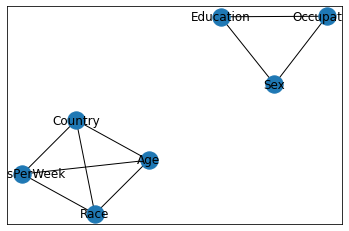

In [118]:
nx.draw_networkx(G, pos)